# **7. jointplot**

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

plt.style.use('seaborn')
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Paperlogy'

In [2]:
import numpy as np
import pandas as pd
 
n = 1000
 
# 기본 능력치 생성 (학생들의 전반적인 학습 능력)
base_ability = np.random.normal(0, 1, size=n)
physical_ability = np.random.normal(0, 1, size=n)  # 체육 능력 추가
 
# 과목별 점수 생성
국어 = 75 + 10 * (0.7 * base_ability + 0.3 * np.random.normal(0, 1, size=n))
영어 = 72 + 12 * (0.6 * base_ability + 0.4 * np.random.normal(0, 1, size=n))
수학 = 70 + 15 * (0.8 * base_ability + 0.2 * np.random.normal(0, 1, size=n))
# 체육은 수학과 반비례하도록 -base_ability 사용
체육 = 80 + 8 * (-0.6 * base_ability + 0.8 * physical_ability + 0.2 * np.random.normal(0, 1, size=n))
 
# 점수 범위 조정 및 반올림
data = {
    '국어': np.round(np.clip(국어, 50, 100), 1),
    '영어': np.round(np.clip(영어, 50, 100), 1),
    '수학': np.round(np.clip(수학, 50, 100), 1),
    '체육': np.round(np.clip(체육, 50, 100), 1),
    '성별': np.random.choice(['남', '여'], size=n),
    '반': np.random.choice([f'{i}반' for i in range(1,10)], size=n)
}
 
df = pd.DataFrame(data)

## **1. jointplot 기본**
* 기본은 산점도 형태로 나온다.

Text(0.5, 1.02, '국어와 수학의 상관관계')

<Figure size 1000x1000 with 0 Axes>

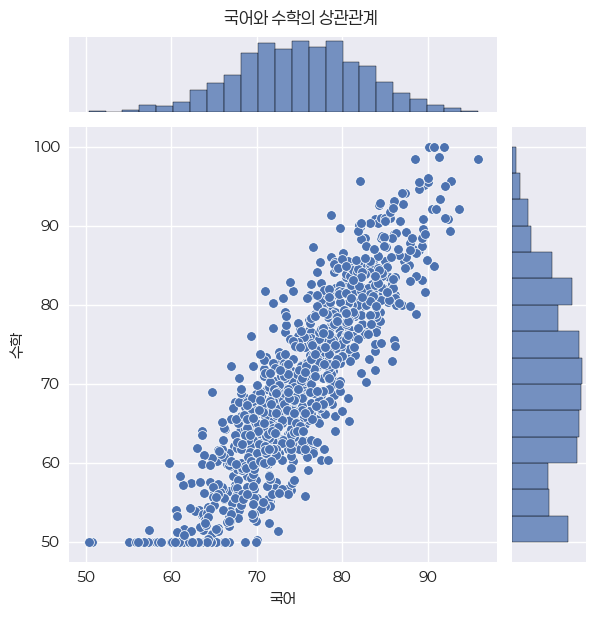

In [3]:
plt.figure(figsize=(10, 10))
 
sns.jointplot(
    # 기본 데이터 설정: 데이터프레임 / X축 / Y축
    data=df, x='국어', y='수학',
)
plt.suptitle('국어와 수학의 상관관계', y=1.02)

## **2. jointplot : scatter**

* relplot같은 느낌이라서 객체 할당하는게 다른 플롯이랑 다르다.

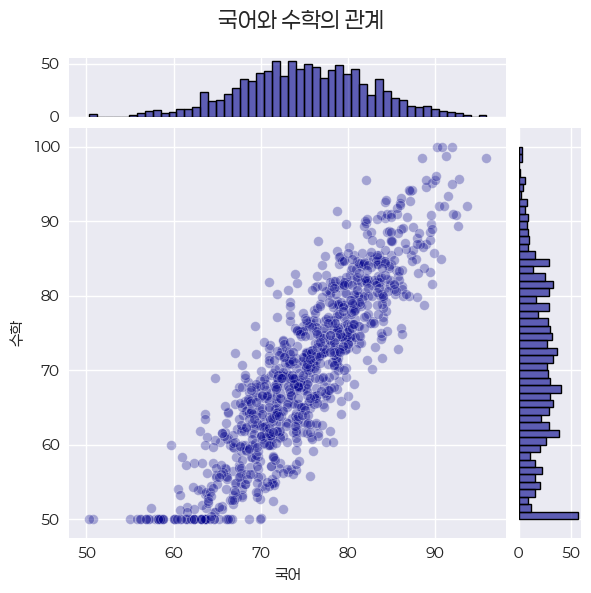

In [4]:
joint_scatter_plot = sns.jointplot(
    # 기본 데이터 설정: 데이터프레임 / X축 / Y축
    data=df, x='국어', y='수학',
    
    # 산점도 설정: 종류 / 색상 / 투명도 / 점크기 / 마커종류
    kind='scatter', color='darkblue', alpha=0.3, s=50, marker='o',
    
    # 크기 설정: 차트 변 / 중앙vs주변 비율 / 중앙 주변 공간
    height=6, ratio=6, space=0.2,
    
    # 주변 분포 설정: 눈금표시 / 구간개수 / 색상 / 투명도 / 테두리
    marginal_ticks=True,
    marginal_kws={'bins':50, 'color':'darkblue', 'alpha':0.6,
                  'edgecolor':'black', 'linewidth':1}
)

# 제목 및 기타 설정
joint_scatter_plot.fig.suptitle('국어와 수학의 관계', fontsize=16)  # 제목 설정
joint_scatter_plot.fig.subplots_adjust(top=0.9)  # 위쪽 여백 조정

# 그래프 출력
plt.show()

## **3. jointplot scatter snippet**


In [5]:
# "Seaborn Jointplot Scatter Template": {
# 	"prefix": "sns_jointscatter",
# 	"body": [
# 	  "# 1. 데이터 설정: 데이터프레임 / X축 / Y축",
# 	  "joint_scatter_plot = sns.jointplot(",
# 	  "    data=${1:df}, x='${2:col1}', y='${3:col2}',",
# 	  "",
# 	  "# 2. 산점도 설정: 종류 / 색상 / 투명도 / 점크기 / 마커종류",
# 	  "    kind='scatter', color='${4:darkblue}', alpha=${5:0.3}, s=${6:50}, marker='${7:o}',",
# 	  "",
# 	  "# 3. 크기 설정: 차트 크기 / 중앙vs주변 비율 / 중앙 주변 공간",
# 	  "    height=${8:6}, ratio=${9:6}, space=${10:0.2},",
# 	  "",
# 	  "# 4. 히스토그램 설정: 눈금표시 / 구간개수 / 색상 / 투명도 / 테두리색상 / 테두리두께 / 통계량",
# 	  "marginal_ticks=True,",
# 	  "marginal_kws={'bins':${12:50}, 'color':'${13:darkblue}', 'alpha':${14:0.6},",
# 	  "             'edgecolor':'white', 'linewidth':1, 'stat':'count'}",
# 	  ")",b
# 	  "",
# 	  "# 5. 제목 및 기타 설정: 제목 / 여백 조정",
# 	  "joint_scatter_plot.fig.suptitle('${16:title}', fontsize=${17:16})",
# 	  "joint_scatter_plot.fig.subplots_adjust(top=${18:0.9})",
# 	  "plt.show()"
# 	],
# 	"description": "Create a Seaborn jointplot with customizable scatter plot and surrounding distribution"
#   }

## **4. jointplot kde**

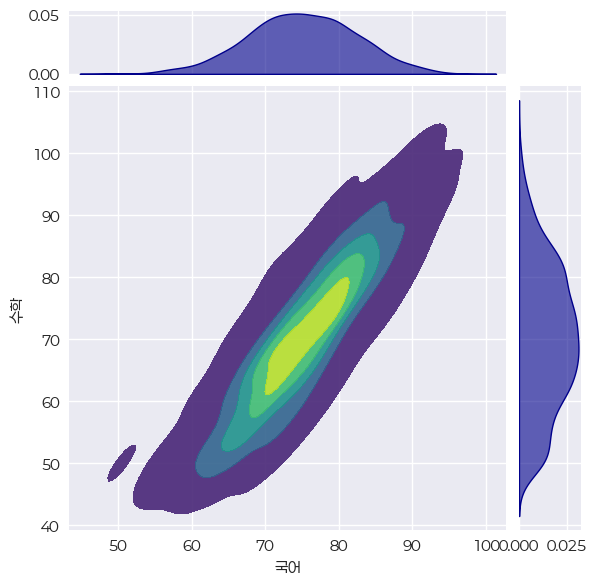

In [6]:
joint_kde_plot = sns.jointplot(
    data=df,x='국어', y='수학',

    # 2. KDE 설정: 종류 / 색상맵 / 투명도
    kind='kde', cmap='viridis', alpha=0.9,

    # 3. 크기 설정: 차트 크기 / 중앙vs주변 비율 / 중앙 주변 공간
    height=6, ratio=6, space=0.2,

    # 4. KDE 설정: 등고선 수 / 채우기(영역 사이) / 최소밀도 (0이면 전부 칠함)
    joint_kws={'levels':6, 'fill':True, 'thresh':0.01},

    # 5. 주변 분포 설정: 눈금표시 / 채우기 / 색상 / 투명도 / 선두께 / 선스타일
    marginal_ticks=True,
    marginal_kws={'fill':True, 'color':'darkblue', 'alpha':0.6,
                 'linewidth':1, 'linestyle':'-'}
)

## **5. jointplot kde snippet**

In [7]:
# "Seaborn Jointplot KDE Template": {
# 	"prefix": "sns_jointkde",
# 	"body": [
# 	  "joint_kde_plot = sns.jointplot(",
# 	  "    # 1. 데이터 설정: 데이터프레임 / X축 / Y축",
# 	  "    data=${1:df}, x='${2:col1}', y='${3:col2}',",
# 	  "",
# 	  "    # 2. KDE 설정: 종류 / 색상맵 / 투명도",
# 	  "    kind='kde', cmap='${4:viridis}', alpha=${5:0.8},",
# 	  "",
# 	  "    # 3. 크기 설정: 차트 크기 / 중앙vs주변 비율 / 중앙 주변 공간",
# 	  "    height=${6:8}, ratio=${7:8}, space=${8:0.2},",
# 	  "",
# 	  "    # 4. KDE 설정: 등고선 수 / 채우기 / 최소밀도",
# 	  "    joint_kws={'levels':${9:6}, 'fill':${10:True}, 'thresh':${11:0.01}},",
# 	  "",
# 	  "    # 5. 히스토그램 설정: 눈금표시 / 구간개수 / 색상 / 투명도 / 테두리색상 / 테두리두께 / 통계량",
# 	  "    marginal_ticks=True,",
# 	  "    marginal_kws={'bins':${12:50}, 'color':'${13:darkblue}', 'alpha':${14:0.6},",
# 	  "                 'edgecolor':'white', 'linewidth':1, 'stat':'count'}",
# 		  ")",
# 	  "# 6. 제목 및 기타 설정: 제목 / 여백 조정",
# 	  "joint_kde_plot.fig.suptitle('${16:title}', fontsize=${17:16})",
# 	  "joint_kde_plot.fig.subplots_adjust(top=${18:0.9})",
# 	  "plt.show()"
# 	],
# 	"description": "Create a Seaborn KDE jointplot with common parameters"
#   }

## **6. jointplot hex**

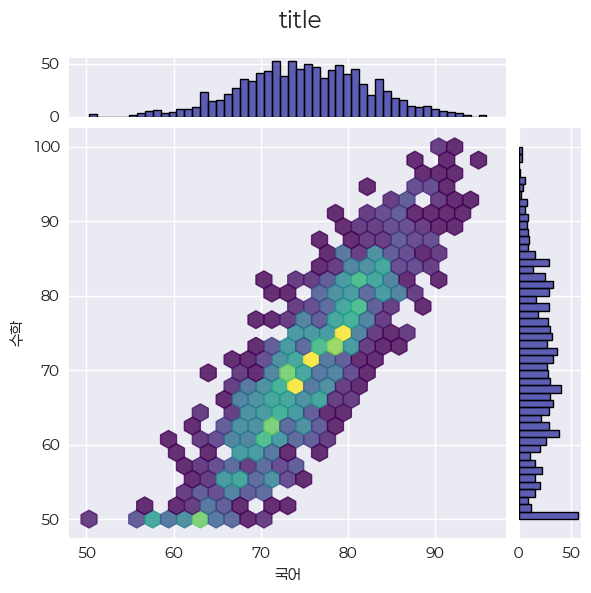

In [8]:
joint_hex_plot = sns.jointplot(
    # 1. 데이터 설정: 데이터프레임 / X축 / Y축
    data=df, x='국어', y='수학',

    kind='hex', cmap='viridis', alpha=0.8,

    # 3. 크기 설정: 차트 크기 / 중앙vs주변 비율 / 중앙 주변 공간
    height=6, ratio=6, space=0.2,

    # 4. hex 설정: 그리드크기 / 최소카운트(없으면 전부 칠함) / 러그표시 (테두리)
    joint_kws={'gridsize':25, 'mincnt':1, 'marginals':False},

    # 5. 히스토그램 설정: 눈금표시 / 구간개수 / 색상 / 투명도 / 테두리색상 / 테두리두께 / 통계량
    marginal_ticks=True,
    marginal_kws={'bins':50, 'color':'darkblue', 'alpha':0.6,
                 'edgecolor':'black', 'linewidth':1, 'stat':'count'}
)
# 6. 제목 및 기타 설정: 제목 / 여백 조정
joint_hex_plot.fig.suptitle('title', fontsize=16)
joint_hex_plot.fig.subplots_adjust(top=0.9)
plt.show()

## **7. jointplot hex snippet**

In [9]:
#   "Seaborn Jointplot Hex Template": {
# 	"prefix": "sns_jointhex",
# 	"body": [
# 	  "joint_hex_plot = sns.jointplot(",
# 	  "    # 1. 데이터 설정: 데이터프레임 / X축 / Y축",
# 	  "    data=${1:df}, x='${2:col1}', y='${3:col2}',",
# 	  "",
# 	  "    # 2. 육각형 설정: 종류 / 색상맵 / 투명도",
# 	  "    kind='hex', cmap='${4:viridis}', alpha=${5:0.8},",
# 	  "",
# 	  "    # 3. 크기 설정: 차트 크기 / 중앙vs주변 비율 / 중앙 주변 공간",
# 	  "    height=${6:8}, ratio=${7:8}, space=${8:0.2},",
# 	  "",
# 	  "    # 4. hex 설정: 그리드크기 / 최소카운트 / 러그표시",
# 	  "    joint_kws={'gridsize':${9:25}, 'mincnt':${10:None}, 'marginals':${11:False}},",
# 	  "",
# 	  "    # 5. 히스토그램 설정: 눈금표시 / 구간개수 / 색상 / 투명도 / 테두리색상 / 테두리두께 / 통계량",
# 	  "    marginal_ticks=True,",
# 	  "    marginal_kws={'bins':${12:50}, 'color':'${13:darkblue}', 'alpha':${14:0.6},",
# 	  "                 'edgecolor':'white', 'linewidth':1, 'stat':'count'}",
# 	  ")",
# 	  "# 6. 제목 및 기타 설정: 제목 / 여백 조정",
# 	  "joint_hex_plot.fig.suptitle('${16:title}', fontsize=${17:16})",
# 	  "joint_hex_plot.fig.subplots_adjust(top=${18:0.9})",
# 	  "plt.show()"
# 	],
# 	"description": "Create a Seaborn hex jointplot with common parameters"
#   }

## **8. jointplot reg** 

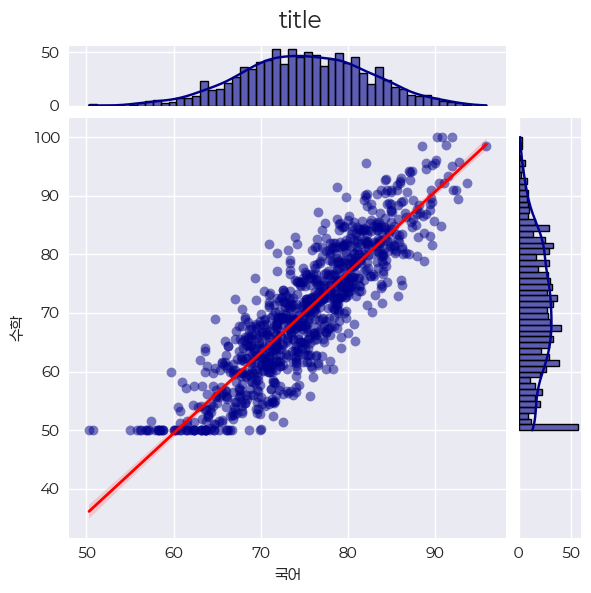

In [10]:
joint_hex_plot = sns.jointplot(
    # 1. 데이터 설정: 데이터프레임 / X축 / Y축
    data=df, x='국어', y='수학',

    # 2. reg 설정: 종류 / 색상
    kind='reg', color='darkblue',

    # 3. 크기 설정: 차트 변 / 중앙vs주변 비율 / 중앙 주변 공간
    height=6, ratio=6, space=0.2,

    # 4. 회귀선 설정: 산점도 설정 / 회귀선 설정
    joint_kws={'scatter_kws':{'alpha':0.5, 's':50, 'marker':'o'},
               'line_kws':{'color':'red', 'linewidth':2}},

    # 5. 히스토그램 설정: 눈금표시 / 구간개수 / 색상 / 투명도 / 테두리색상 / 테두리두께 / 통계량
    marginal_ticks=True,
    marginal_kws={'bins':50, 'color':'darkblue', 'alpha':0.6,
                 'edgecolor':'black', 'linewidth':1, 'stat':'count'}
)

# 6. 제목 및 기타 설정: 제목 / 여백 조정
joint_hex_plot.fig.suptitle('title', fontsize=16)
joint_hex_plot.fig.subplots_adjust(top=0.92)
plt.show()

## **9. jointplot reg snippet** 

In [11]:
#   "Seaborn Jointplot Regression Template": {
# 	"prefix": "sns_jointreg",
# 	"body": [
# 	  "joint_hex_plot = sns.jointplot(",
# 	  "    # 1. 데이터 설정: 데이터프레임 / X축 / Y축",
# 	  "    data=${1:df}, x='${2:col1}', y='${3:col2}',",
# 	  "",
# 	  "    # 2. reg 설정: 종류 / 색상",
# 	  "    kind='reg', color='${4:darkblue}',",
# 	  "",
# 	  "    # 3. 크기 설정: 차트 변 / 중앙vs주변 비율 / 중앙 주변 공간",
# 	  "    height=${5:8}, ratio=${6:8}, space=${7:0.2},",
# 	  "",
# 	  "    # 4. 회귀선 설정: 산점도 설정 / 회귀선 설정",
# 	  "    joint_kws={'scatter_kws':{'alpha':${8:0.5}, 's':${9:50}, 'marker':'${10:o}'},",
# 	  "               'line_kws':{'color':'${11:red}', 'linewidth':${12:2}}},",
# 	  "",
# 	  "    # 5. 히스토그램 설정: 눈금표시 / 구간개수 / 색상 / 투명도 / 테두리색상 / 테두리두께 / 통계량",
# 	  "    marginal_ticks=True,",
# 	  "    marginal_kws={'bins':${13:50}, 'color':'${14:darkblue}', 'alpha':${15:0.6},",
# 	  "                 'edgecolor':'white', 'linewidth':1, 'stat':'count'}",
# 	  ")",
# 	  "",
# 	  "# 6. 제목 및 기타 설정: 제목 / 여백 조정",
# 	  "joint_hex_plot.fig.suptitle('${16:title}', fontsize=${17:16})",
# 	  "joint_hex_plot.fig.subplots_adjust(top=${18:0.92})",
# 	  "plt.show()"
# 	],
# 	"description": "Create a Seaborn regression jointplot with common parameters"
#   }